# Introduction
This project focuses on anomaly detection in credit card transactions over time, leveraging data science techniques to identify fraudulent activities. The primary objective is to detect unusual patterns, spikes, and trends that signify potential fraud, providing a clear representation of these anomalies. By analysing transactional data, we can understand the temporal distribution of fraud and differentiate between normal and suspicious behaviour.

Anomalies in financial transactions can have significant implications for risk management, and understanding when fraud occurs can guide proactive measures. For example, identifying fraud spikes during off-peak hours can help refine monitoring systems. This analysis not only visualises fraudulent trends but also offers insights that can improve fraud prevention strategies and enhance the efficiency of detection systems.

## Dataset Overview
The dataset includes:
- **Time**: Seconds since the first transaction.
- **V1 to V28**: Principal components derived from a PCA transformation (anonymised features).
- **Amount**: The transaction amount.
- **Class**: The target variable, where 1 indicates fraud and 0 indicates non-fraud.

## 1. Loading and Exploring the Dataset
I first load the dataset and explore the initial structure of the data to understand its contents.

In [33]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/Users/samihaque/Library/CloudStorage/OneDrive-Personal/Projects/Python/Fraud detection/creditcard.csv")

# Display basic information about the dataset
print(data.info())
print(data.head())

# Checking for any missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 2. Creating a New Time-Based Column
I then created a new column **Hour** to represent the transaction time in hours, making it easier to analyse time-based patterns.

In [34]:
# Creating a new column named Hour to represent the transaction time in hours
data['Hour'] = (data['Time'] // 3600) % 24

## 3. Visualising Fraudulent Transactions Over Time
Here, all fraudulent transactions was plotted by **time** and **amount**, using red dots to represent the fraudulent transactions.

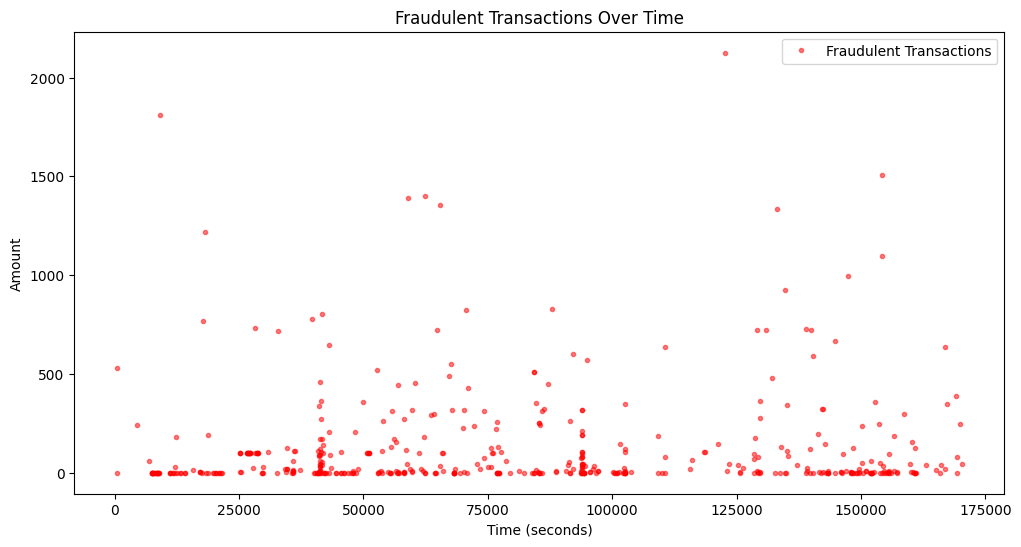

In [35]:
# Separate fraudulent and non-fraudulent transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Plotting fraudulent transactions over time
plt.figure(figsize=(12,6))
plt.plot(fraud['Time'], fraud['Amount'], 'r.', label='Fraudulent Transactions', alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.legend()
plt.show()

This plot visualises the **fraudulent transactions over time**, where each red dot represents an individual fraudulent transaction. The y-axis shows the transaction amounts, and the x-axis shows the time in seconds since the first transaction.

We can observe several spikes in fraudulent transaction amounts, some exceeding **2000 units**. These spikes suggest concentrated periods where high-value fraudulent activity occurred, which may indicate potential organised fraud. The plot also highlights a general pattern of low-value fraudulent transactions scattered throughout the time period, which could suggest attempts to disguise fraud among smaller, normal transactions.

## 4. Comparing Hourly Transaction Volume for Fraud and Non-Fraud
I group the transactions by **hour** and plot the number of fraudulent and non-fraudulent transactions per hour.

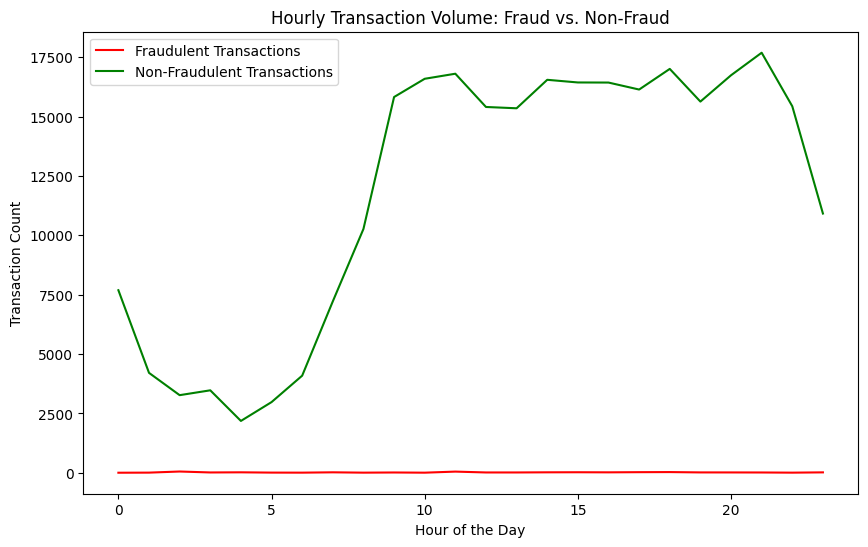

In [36]:
# Aggregating fraudulent and non-fraudulent transactions over hours
hourly_fraud = fraud.groupby('Hour').size()
hourly_non_fraud = non_fraud.groupby('Hour').size()

# Plotting transaction volume over the day for fraud vs non-fraud transactions
plt.figure(figsize=(10,6))
plt.plot(hourly_fraud.index, hourly_fraud, label='Fraudulent Transactions', color='r')
plt.plot(hourly_non_fraud.index, hourly_non_fraud, label='Non-Fraudulent Transactions', color='g')
plt.title('Hourly Transaction Volume: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

This plot compares the number of fraudulent (red) and non-fraudulent (green) transactions throughout the day. While non-fraudulent transactions show **clear trends** with peaks between 9 AM and 6 PM (typical business hours), fraudulent transactions remain **relatively flat** with a small number of events throughout the day.

Interestingly, fraudulent transactions show no clear time-based pattern. However, their presence in all hours may indicate a continuous attempt at fraudulent activity. Non-fraudulent transaction spikes in business hours make sense, but the lack of similar spikes in fraudulent activity could suggest an attempt to operate under the radar, potentially during low-activity periods like late night or early morning.

## 5. Distribution of Fraud and Non-Fraud Transactions by Hour
I visualise the distribution of fraud and non-fraud transactions over different hours using histograms.

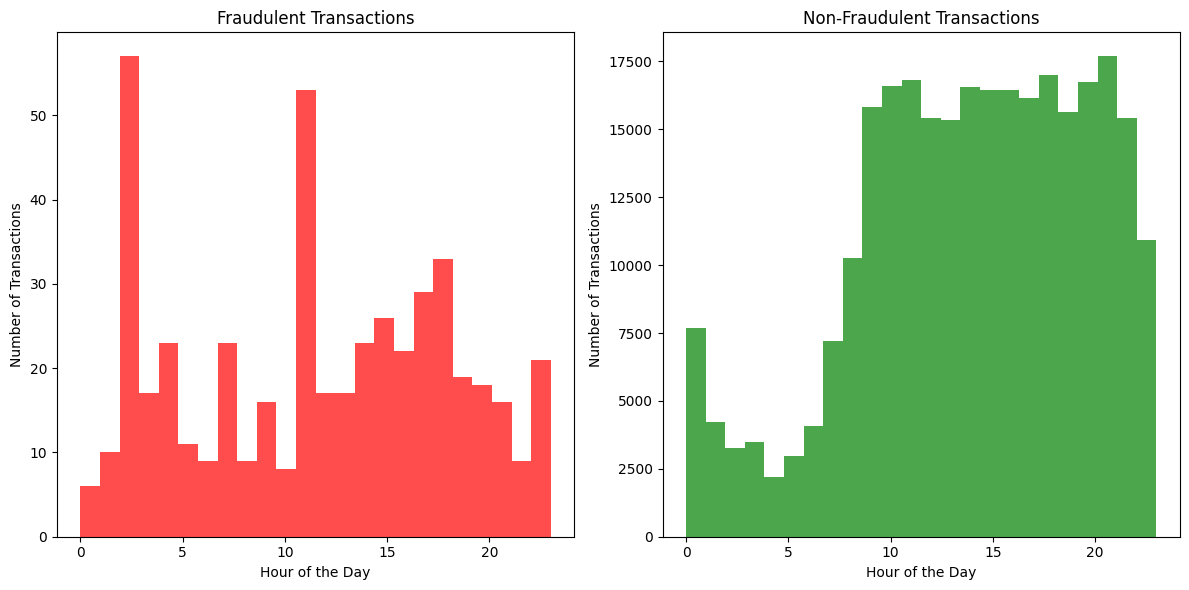

In [37]:
# Time-series comparison of transaction amounts between fraud and non-fraud transactions

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Fraudulent transactions
plt.subplot(1, 2, 1)  # (rows, columns, subplot position)
plt.hist(fraud['Hour'], bins=24, alpha=0.7, label='Fraudulent Transactions', color='red')
plt.title('Fraudulent Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')

# Non-fraudulent transactions
plt.subplot(1, 2, 2)
plt.hist(non_fraud['Hour'], bins=24, alpha=0.7, label='Non-Fraudulent Transactions', color='green')
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')

# Display the plot
plt.tight_layout()
plt.show()

The histogram illustrates the distribution of fraudulent (red) and non-fraudulent (green) transactions across each hour of the day. Fraudulent transactions occur **relatively evenly** throughout the 24-hour cycle, while non-fraudulent transactions are concentrated between the **daytime hours** (primarily 8 AM to 8 PM), which corresponds to normal business hours.

The uniform distribution of fraudulent transactions implies that fraudulent activity may not follow the same time-of-day trends as legitimate transactions. This could suggest that fraudulent activities are either automated or strategically executed at different times of the day to avoid detection, particularly during off-peak hours when regular transactions decrease.

## 6. Average Transaction Amount by Hour
I calculate and plot the average transaction amounts for fraud and non-fraud transactions over different hours.

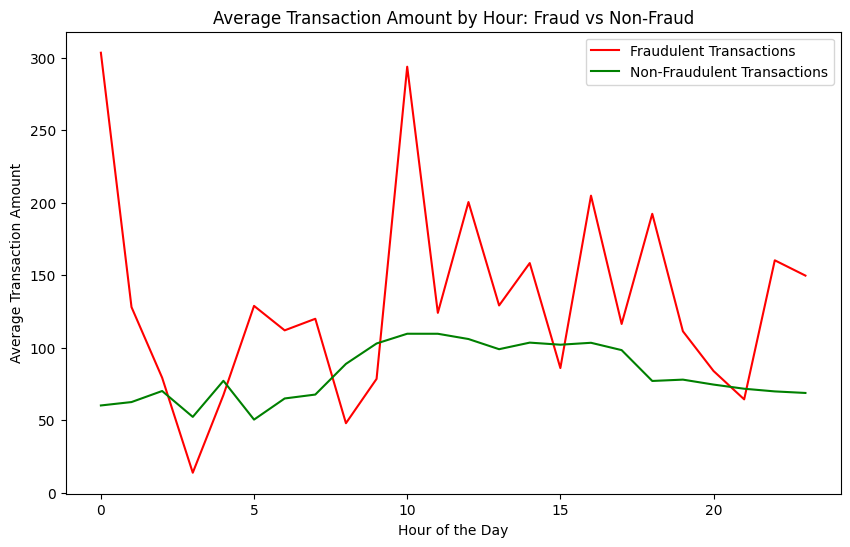

In [38]:
# Plotting the average transaction amount over time
average_fraud = fraud.groupby('Hour')['Amount'].mean()
average_non_fraud = non_fraud.groupby('Hour')['Amount'].mean()

plt.figure(figsize=(10,6))
plt.plot(average_fraud.index, average_fraud, label='Fraudulent Transactions', color='r')
plt.plot(average_non_fraud.index, average_non_fraud, label='Non-Fraudulent Transactions', color='g')
plt.title('Average Transaction Amount by Hour: Fraud vs Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Transaction Amount')
plt.legend()
plt.show()

The line plot illustrates the average transaction amount for both fraudulent (red) and non-fraudulent (green) transactions across different hours of the day. Fraudulent transactions show **significant variability**, with large fluctuations in the average amounts throughout the 24-hour period. 

In contrast, non-fraudulent transactions maintain a **more stable trend**, peaking during regular business hours (approximately 8 AM to 8 PM). The variability and higher peaks in fraudulent transactions suggest that these may be strategically executed at irregular times and amounts, potentially to evade detection, while legitimate transactions follow more consistent patterns tied to the daily flow of business.

## 7. Detecting Anomalies Based on High Transaction Amounts
Finally, anomalies can be detected based on **unusually high transaction amounts** which are plotted over time.

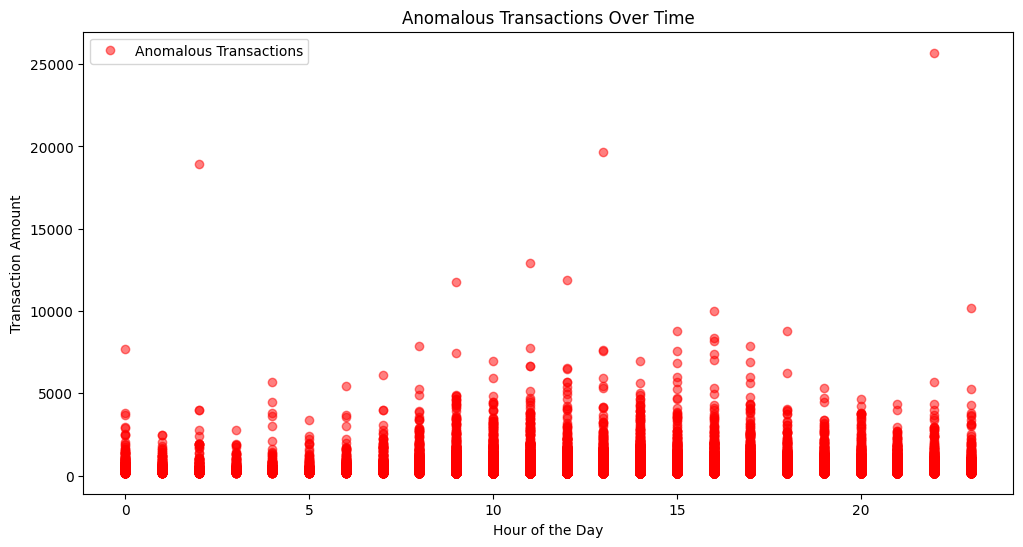

In [39]:
# Detecting anomalies based on transaction amounts
threshold = 2 * data['Amount'].mean()  # Set the threshold for detecting unusually high transactions
anomalies = data[data['Amount'] > threshold]

# Plotting anomalous transactions over time
plt.figure(figsize=(12,6))
plt.plot(anomalies['Hour'], anomalies['Amount'], 'ro', label='Anomalous Transactions', alpha=0.5)
plt.title('Anomalous Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

The scatter plot visualises anomalous transactions over time, with transaction amounts represented on the y-axis and time (in hours) on the x-axis. Most of the transactions cluster at lower amounts, but a few notable outliers exhibit extremely high values, some exceeding **20,000**. These high-value anomalies **occur irregularly** across the entire time frame, indicating that these anomalous transactions **do not follow a consistent pattern**. The presence of these outliers suggests that such transactions may be fraudulent, as they stand out from the bulk of normal transactions and could signal unusual activity that requires closer investigation.

# Conclusion

To conclude I applied anomaly detection techniques to identify fraudulent activity in credit card transactions. Key insights were:

1. **Fraudulent Transactions Over Time:** The first plot highlighted the distribution of fraudulent transactions over time, revealing that while most fraudulent transactions are of low value, there are distinct spikes where high-value frauds occur. These outliers are critical for further investigation.

2. **Hourly Transaction Volume: Fraud vs. Non-Fraud:** The second plot compared the volume of fraudulent and non-fraudulent transactions over the course of a day. It showed that while non-fraudulent transactions follow a predictable hourly pattern with peaks during typical business hours, fraudulent transactions remain consistently low, indicating that fraud does not follow the same temporal patterns.

3. **Distribution of Transactions by Hour:** The third plot provided a clear comparison of fraudulent and non-fraudulent transactions by hour. Non-fraudulent transactions dominate all hours of the day, with fraudulent transactions being a small but significant minority. However, small increases in fraudulent activity during certain hours may suggest targeted attacks.

4. **Average Transaction Amount by Hour:** The plot showing the average transaction amount per hour revealed that fraudulent transactions have occasional spikes in value compared to non-fraudulent ones, which remain more consistent. These spikes are indicative of high-value frauds, potentially linked to organised schemes.

5. **Anomalous Transactions Over Time:** The final plot identified anomalies based on transaction amounts, helping to flag transactions that exceed a set threshold. This method effectively highlighted potential fraud cases involving unusually high amounts, pointing to patterns that deviate from the norm.

This project was inspired by an article on [GeeksforGeeksAI](https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/), and the dataset used is available on [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
